In [3]:
def load_dataset(data_path):
    import torch
    import torchvision
    from torchvision import transforms
    from torchvision.datasets import ImageFolder
    from torch.utils.data import DataLoader
    from torch.utils.data import random_split

    # define transformation to randomly augment image data
    transformation = transforms.Compose([
        # random horizontal flip
        transforms.RandomHorizontalFlip(0.5),
        # random vertical flip
        transforms.RandomVerticalFlip(0.3),
        # transform to tensors
        transforms.ToTensor(),
        # normalise pixel values (RGB channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # load all images and transform them
    full_dataset = ImageFolder(
        root=data_path,
        transform=transformation
    )

    # split dataset into 70% training and 30% test
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size

    # random training/test split
    train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

    # define loader for training data
    train_loader = DataLoader(
        train_dataset,
        batch_size=32,
        num_workers=0,
        shuffle=False
    )

    # define loader for testing data
    test_loader = DataLoader(
        test_dataset,
        batch_size=32,
        num_workers=0,
        shuffle=False
    )
    
    return train_loader, test_loader

In [4]:
train_folder = '../Datasets/asl_alphabet_train/'

train_loader, test_loader = load_dataset(train_folder)
batch_size = train_loader.batch_size
print('Data loaders ready to read', train_folder)

Data loaders ready to read ../Datasets/asl_alphabet_train/


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


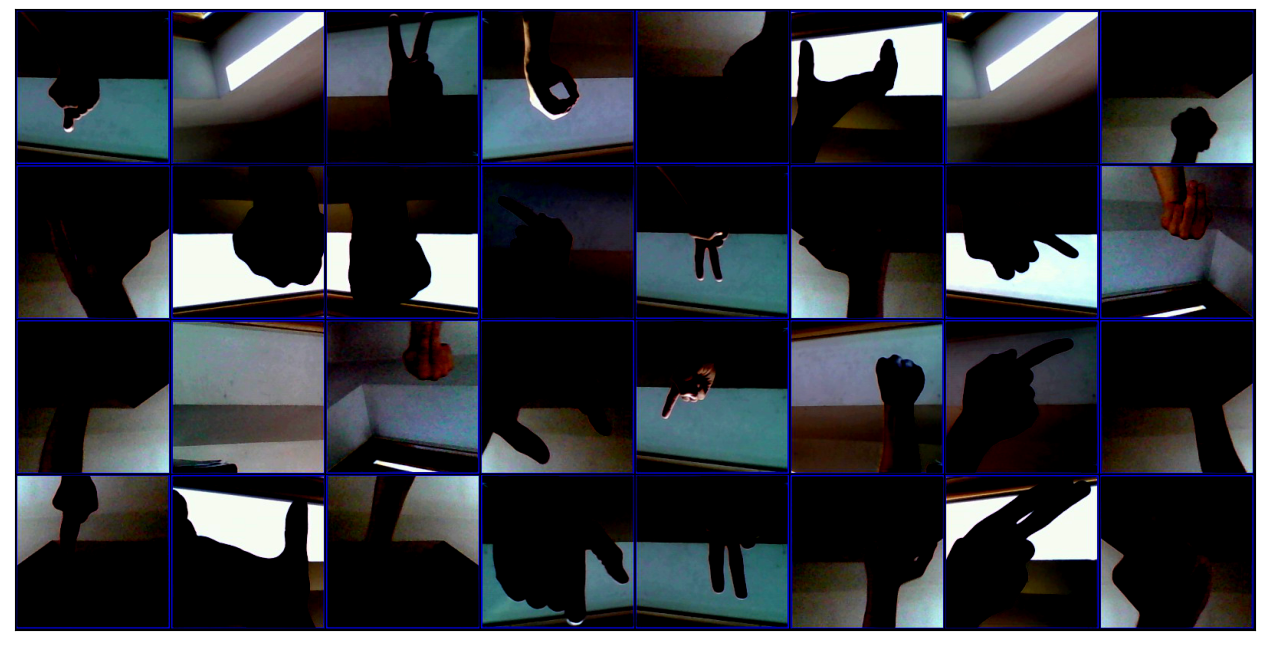

In [7]:
def show_batch(dl):
    """Plot grid of images in a single batch"""
    import matplotlib.pyplot as plt
    from torchvision.utils import make_grid
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1,2,0))
        break

__spec__ = None
show_batch(train_loader)